In [120]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv('C:/Users/yakul/mutipage/data/quarter.csv')


In [122]:
df

,Date,Sale
0,Q1-2018,462880
1,Q2-2018,502700
2,Q3-2018,516400
3,Q4-2018,475650
4,Q1-2019,367100
5,Q2-2019,430900
6,Q3-2019,497600
7,Q4-2019,477720
8,Q1-2020,419210
9,Q2-2020,390890


In [123]:
df.shape

(17, 2)

Text(0, 0.5, 'Sale Price PESO(₱)')

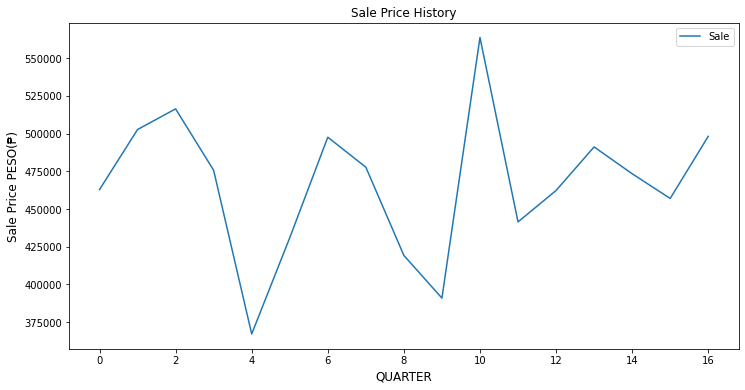

In [124]:
df.plot(figsize=(12,6))
plt.title('Sale Price History')
plt.xlabel('QUARTER', fontsize = 12)
plt.ylabel('Sale Price PESO(₱)', fontsize = 12)


In [125]:
data = df.filter(['Sale'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .60)
training_data_len

11

In [126]:
ma4 = df.Sale.rolling(4).mean()
ma4

0           NaN
1           NaN
2           NaN
3     489407.50
4     465462.50
5     447512.50
6     442812.50
7     443330.00
8     456357.50
9     446355.00
10    462895.00
11    453818.75
12    464580.00
13    489645.00
14    467048.75
15    470942.50
16    479922.50
Name: Sale, dtype: float64

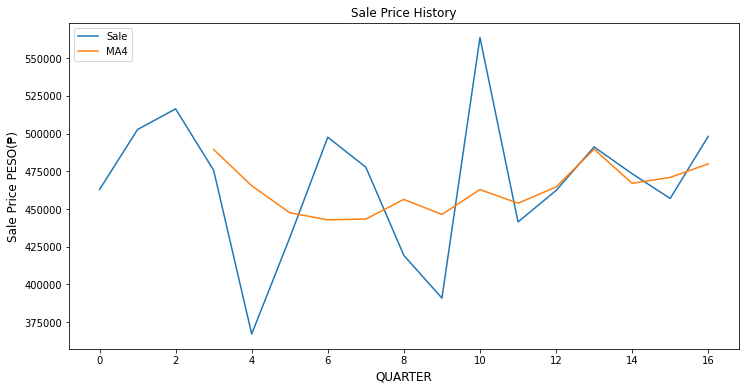

In [127]:
plt.figure(figsize = (12,6))
plt.plot(df.Sale)
plt.plot(ma4)
plt.title('Sale Price History')
plt.xlabel('QUARTER', fontsize = 12)
plt.ylabel('Sale Price PESO(₱)', fontsize = 12)
plt.legend(['Sale','MA4'], loc = 'upper left')

In [128]:
ma8 = df.Sale.rolling(8).mean()
ma8

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7     466368.750
8     460910.000
9     446933.750
10    452853.750
11    448574.375
12    460468.750
13    468000.000
14    464971.875
15    462380.625
16    472251.250
Name: Sale, dtype: float64

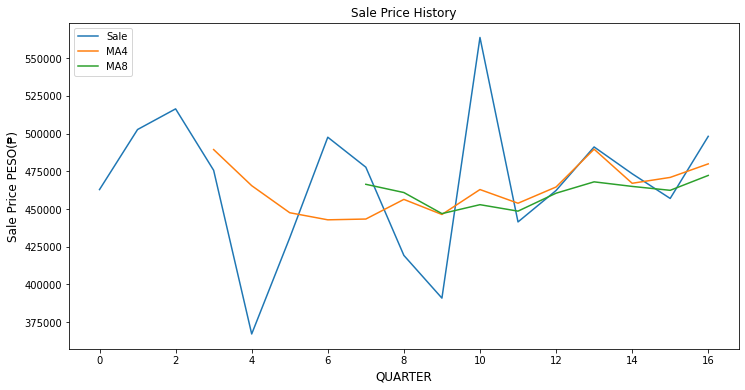

In [129]:
plt.figure(figsize = (12,6))
plt.plot(df.Sale)
plt.plot(ma4)
plt.plot(ma8)
plt.title('Sale Price History')
plt.xlabel('QUARTER', fontsize = 12)
plt.ylabel('Sale Price PESO(₱)', fontsize = 12)
plt.legend(['Sale','MA4', 'MA8'], loc = 'upper left')

In [130]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.48703346],
       [0.6895149 ],
       [0.75917828],
       [0.55196786],
       [0.        ],
       [0.32441778],
       [0.66358182],
       [0.56249364],
       [0.26497508],
       [0.1209702 ],
       [1.        ],
       [0.37788569],
       [0.48385538],
       [0.63078409],
       [0.54039967],
       [0.45708329],
       [0.66650564]])

In [131]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(4, len(train_data)):
  x_train.append(train_data[i-4:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 4:
    print(x_train)
    print(y_train)
    print()

[array([0.48703346, 0.6895149 , 0.75917828, 0.55196786])]
[0.0]



In [132]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [133]:

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(7, 4, 1)

In [134]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [135]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [136]:
model.compile(optimizer='adam', loss= 'mean_squared_error')

In [137]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 4, 50)             10400     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_8 (Dense)             (None, 25)                1275      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [138]:

model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
7/7 [==============================] - 2s 9ms/step - loss: 0.2375
Epoch 2/20
7/7 [==============================] - 0s 9ms/step - loss: 0.1575
Epoch 3/20
7/7 [==============================] - 0s 10ms/step - loss: 0.1161
Epoch 4/20
7/7 [==============================] - 0s 9ms/step - loss: 0.1104
Epoch 5/20
7/7 [==============================] - 0s 8ms/step - loss: 0.1187
Epoch 6/20
7/7 [==============================] - 0s 8ms/step - loss: 0.1131
Epoch 7/20
7/7 [==============================] - 0s 8ms/step - loss: 0.1117
Epoch 8/20
7/7 [==============================] - 0s 8ms/step - loss: 0.1101
Epoch 9/20
7/7 [==============================] - 0s 8ms/step - loss: 0.1153
Epoch 10/20
7/7 [==============================] - 0s 8ms/step - loss: 0.1205
Epoch 11/20
7/7 [==============================] - 0s 8ms/step - loss: 0.1091
Epoch 12/20
7/7 [==============================] - 0s 8ms/step - loss: 0.1075
Epoch 13/20
7/7 [==============================] - 0s 8ms/step - loss: 0

In [139]:

test_data = scaled_data[training_data_len -4: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(4, len(test_data)):
  x_test.append(test_data[i -4:i, 0])

In [140]:
x_test = np.array(x_test)

In [141]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [142]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 1s 659ms/step


In [143]:

rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

17475.109375

C:\Users\yakul\AppData\Local\Temp\ipykernel_6272\2875159218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction['Predictions'] = predictions


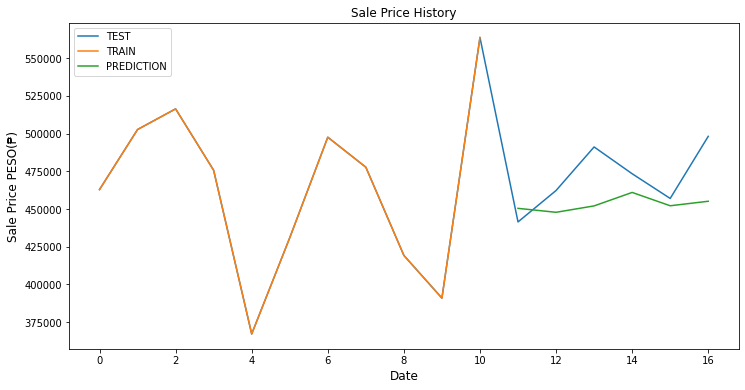

In [144]:
train = data[:training_data_len]
prediction = data[training_data_len:]
prediction['Predictions'] = predictions
plt.figure(figsize=(12,6))
plt.title('Sale Price History')
plt.plot(data)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Sale Price PESO(₱)', fontsize = 12)
plt.plot(train['Sale'])
plt.plot(prediction[[ 'Predictions']])
plt.legend(['TEST','TRAIN','PREDICTION'], loc = 'upper left')
plt.show()


In [145]:
quarter = pd.read_csv('C:/Users/yakul/mutipage/data/week.csv')

newdf = quarter.filter(['Sale'])
last_4_quarter = newdf[-4:].values
last_4_quarter_scaled = scaler.transform(last_4_quarter)
X_test = [] 
X_test.append(last_4_quarter)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_sale = model.predict(X_test)
pred_sale = scaler.inverse_transform(pred_sale)
print(pred_sale)

1/1 [==============================] - 1s 728ms/step
[[520585.34]]
